In [1]:
from dataclasses import dataclass
import csv

import click
import requests
import psycopg2
import psycopg2.extras
import pandas.io.sql as sqlio
import ipympl 


# importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
connection = psycopg2.connect(
        host="localhost",
        database="postgres",
        user="postgres",
        password="senha"
)

In [3]:

curriculo = 'testeNovoAcerto2xSetupPercentual93cenarisdqn3cenarios01_01122023_0156_epsod_'
#curriculo ="testeNovoAcerto2xSetup3cenarisdqn3cenarios01_27112023_2244_epsod_"
stmt = f"select passo,curriculo,accuracy_treinamento,accuracy_teste,acuracy_questao_0,acuracy_questao_1,acuracy_questao_2,acuracy_questao_3,acuracy_questao_4,porcentagem FROM \"Curriculos\" where curriculo like '{curriculo}_%' order by cast(replace(SUBSTR (curriculo,LENGTH(curriculo)-1,2 ),'_','') as INTEGER), passo" 

data = sqlio.read_sql_query(stmt, connection)

C:\Users\MArcelo\AppData\Local\Temp\ipykernel_14500\49061780.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = sqlio.read_sql_query(stmt, connection)


In [4]:
data = sqlio.read_sql_query(stmt, connection)
    # Now data is a pandas dataframe having the results of above query.
data.head()


C:\Users\MArcelo\AppData\Local\Temp\ipykernel_14500\3497097882.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = sqlio.read_sql_query(stmt, connection)


,passo,curriculo,accuracy_treinamento,accuracy_teste,acuracy_questao_0,acuracy_questao_1,acuracy_questao_2,acuracy_questao_3,acuracy_questao_4,porcentagem
0,0,testeNovoAcerto2xSetupPercentual93cenarisdqn3c...,0.06,0.078485,0.071501,0.030917,0.029323,0.134109,0.126321,"1,1,1,1,1"
1,1500,testeNovoAcerto2xSetupPercentual93cenarisdqn3c...,0.39,0.441111,0.578046,0.600101,0.607179,0.214575,0.206341,"1,1,1,1,1"
2,3000,testeNovoAcerto2xSetupPercentual93cenarisdqn3c...,0.45,0.475253,0.658107,0.605170,0.616279,0.244939,0.252139,"1,1,1,1,1"
3,4500,testeNovoAcerto2xSetupPercentual93cenarisdqn3c...,0.27,0.478485,0.554381,0.609225,0.598584,0.320344,0.310518,"0.1,0.1,0.1,1,1"
4,6000,testeNovoAcerto2xSetupPercentual93cenarisdqn3c...,0.40,0.474545,0.523666,0.573239,0.596562,0.344636,0.335179,"0.1,0.1,0.1,1,1"


In [5]:
len(data)


503

In [6]:
def remove(epsodio):
  return epsodio[-2:].replace("_","")
  
data1 = data 
data1['ep'] = data['curriculo'].apply(remove)
data1 = data1.drop('curriculo', axis=1)
data1 = data1.drop('accuracy_treinamento', axis=1)
data1 = data1.drop('accuracy_teste', axis=1)
data1 = data1.drop('porcentagem', axis=1)
data1 = data1.astype({'ep':'int'}) 
data1 = data1.astype({'acuracy_questao_0':'float'}) 
data1 =data1.astype({'acuracy_questao_1':'float'})
data1 =data1.astype({'acuracy_questao_2':'float'})
data1 =data1.astype({'acuracy_questao_3':'float'})
data1 =data1.astype({'acuracy_questao_4':'float'})    
data1

,passo,acuracy_questao_0,acuracy_questao_1,acuracy_questao_2,acuracy_questao_3,acuracy_questao_4,ep
0,0,0.071501,0.030917,0.029323,0.134109,0.126321,0
1,1500,0.578046,0.600101,0.607179,0.214575,0.206341,0
2,3000,0.658107,0.605170,0.616279,0.244939,0.252139,0
3,4500,0.554381,0.609225,0.598584,0.320344,0.310518,0
4,6000,0.523666,0.573239,0.596562,0.344636,0.335179,0
...,...,...,...,...,...,...,...
498,45000,1.000000,1.000000,1.000000,0.326923,0.472068,14
499,46500,1.000000,1.000000,1.000000,0.353239,0.502768,14
500,48000,1.000000,1.000000,1.000000,0.373482,0.568697,14
501,49500,1.000000,1.000000,0.999494,0.365385,0.601409,14


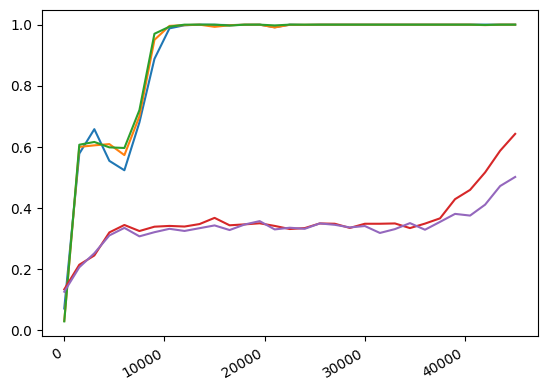

In [7]:
dataEp0 = data1.loc[data1['ep'] ==0 ]
fig, ax = plt.subplots()
ax.plot(dataEp0['passo'], dataEp0['acuracy_questao_0'])
ax.plot(dataEp0['passo'], dataEp0['acuracy_questao_1'])
ax.plot(dataEp0['passo'], dataEp0['acuracy_questao_2'])
ax.plot(dataEp0['passo'], dataEp0['acuracy_questao_3'])
ax.plot(dataEp0['passo'], dataEp0['acuracy_questao_4'])

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
fig.autofmt_xdate()

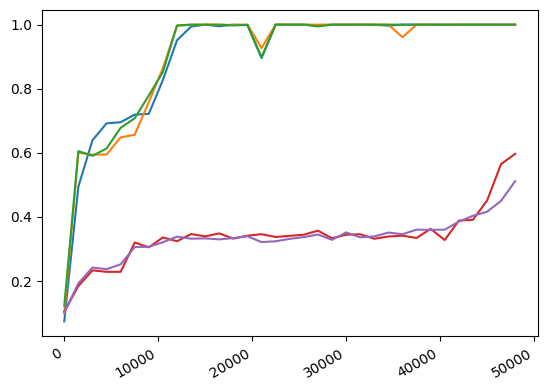

In [8]:
dataEp1 = data1.loc[data1['ep'] ==1 ]
fig, ax = plt.subplots()
ax.plot(dataEp1['passo'], dataEp1['acuracy_questao_0'])
ax.plot(dataEp1['passo'], dataEp1['acuracy_questao_1'])
ax.plot(dataEp1['passo'], dataEp1['acuracy_questao_2'])
ax.plot(dataEp1['passo'], dataEp1['acuracy_questao_3'])
ax.plot(dataEp1['passo'], dataEp1['acuracy_questao_4'])

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
fig.autofmt_xdate()

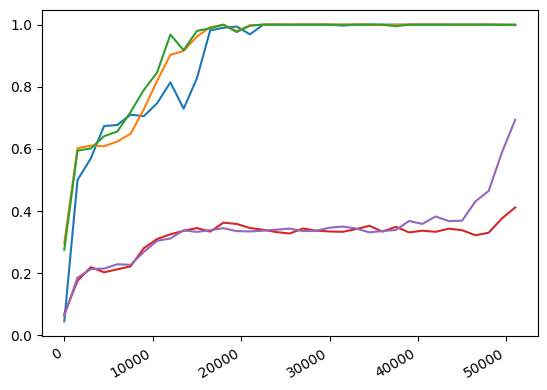

In [9]:
dataEp2 = data1.loc[data1['ep'] ==2 ]

fig, ax = plt.subplots()
ax.plot(dataEp2['passo'], dataEp2['acuracy_questao_0'])
ax.plot(dataEp2['passo'], dataEp2['acuracy_questao_1'])
ax.plot(dataEp2['passo'], dataEp2['acuracy_questao_2'])
ax.plot(dataEp2['passo'], dataEp2['acuracy_questao_3'])
ax.plot(dataEp2['passo'], dataEp2['acuracy_questao_4'])

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
fig.autofmt_xdate()

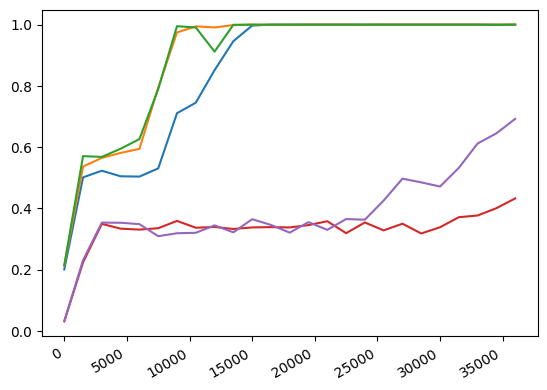

In [10]:
dataEp3 = data1.loc[data1['ep'] ==3 ]

fig, ax = plt.subplots()
ax.plot(dataEp3['passo'], dataEp3['acuracy_questao_0'])
ax.plot(dataEp3['passo'], dataEp3['acuracy_questao_1'])
ax.plot(dataEp3['passo'], dataEp3['acuracy_questao_2'])
ax.plot(dataEp3['passo'], dataEp3['acuracy_questao_3'])
ax.plot(dataEp3['passo'], dataEp3['acuracy_questao_4'])

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
fig.autofmt_xdate()

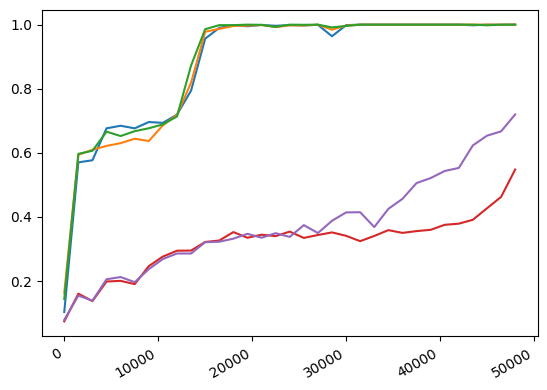

In [11]:
dataEp4 = data1.loc[data1['ep'] ==4 ]

fig, ax = plt.subplots()
ax.plot(dataEp4['passo'], dataEp4['acuracy_questao_0'])
ax.plot(dataEp4['passo'], dataEp4['acuracy_questao_1'])
ax.plot(dataEp4['passo'], dataEp4['acuracy_questao_2'])
ax.plot(dataEp4['passo'], dataEp4['acuracy_questao_3'])
ax.plot(dataEp4['passo'], dataEp4['acuracy_questao_4'])

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
fig.autofmt_xdate()

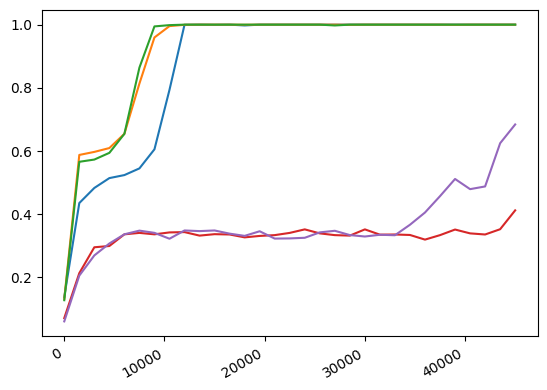

In [12]:
dataEp5 = data1.loc[data1['ep'] ==5 ]

fig, ax = plt.subplots()
ax.plot(dataEp5['passo'], dataEp5['acuracy_questao_0'])
ax.plot(dataEp5['passo'], dataEp5['acuracy_questao_1'])
ax.plot(dataEp5['passo'], dataEp5['acuracy_questao_2'])
ax.plot(dataEp5['passo'], dataEp5['acuracy_questao_3'])
ax.plot(dataEp5['passo'], dataEp5['acuracy_questao_4'])

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
fig.autofmt_xdate()

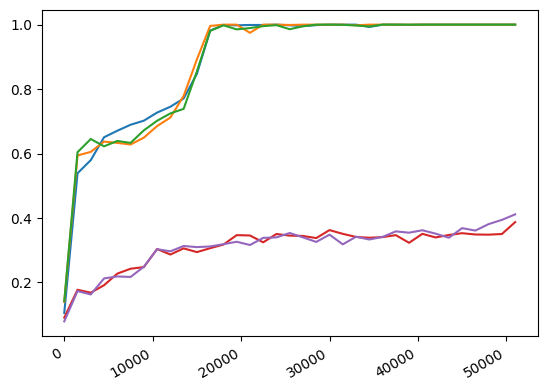

In [13]:
dataEp6 = data1.loc[data1['ep'] ==6 ]

fig, ax = plt.subplots()
ax.plot(dataEp6['passo'], dataEp6['acuracy_questao_0'])
ax.plot(dataEp6['passo'], dataEp6['acuracy_questao_1'])
ax.plot(dataEp6['passo'], dataEp6['acuracy_questao_2'])
ax.plot(dataEp6['passo'], dataEp6['acuracy_questao_3'])
ax.plot(dataEp6['passo'], dataEp6['acuracy_questao_4'])

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
fig.autofmt_xdate()

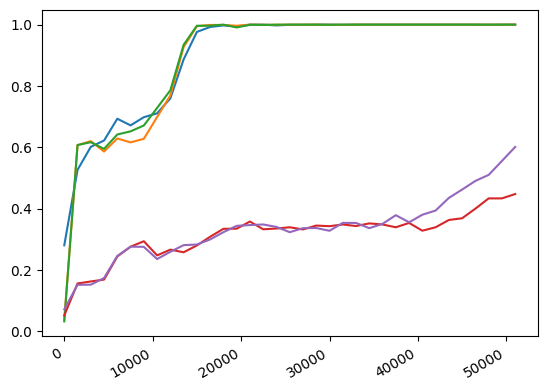

In [14]:
dataEp7 = data1.loc[data1['ep'] ==7 ]

fig, ax = plt.subplots()
ax.plot(dataEp7['passo'], dataEp7['acuracy_questao_0'])
ax.plot(dataEp7['passo'], dataEp7['acuracy_questao_1'])
ax.plot(dataEp7['passo'], dataEp7['acuracy_questao_2'])
ax.plot(dataEp7['passo'], dataEp7['acuracy_questao_3'])
ax.plot(dataEp7['passo'], dataEp7['acuracy_questao_4'])

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
fig.autofmt_xdate()

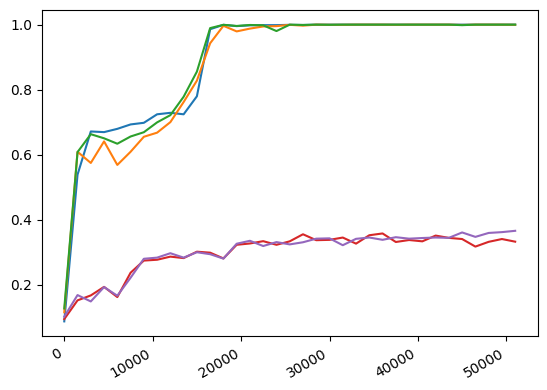

In [15]:
dataEp8 = data1.loc[data1['ep'] ==8 ]

fig, ax = plt.subplots()
ax.plot(dataEp8['passo'], dataEp8['acuracy_questao_0'])
ax.plot(dataEp8['passo'], dataEp8['acuracy_questao_1'])
ax.plot(dataEp8['passo'], dataEp8['acuracy_questao_2'])
ax.plot(dataEp8['passo'], dataEp8['acuracy_questao_3'])
ax.plot(dataEp8['passo'], dataEp8['acuracy_questao_4'])

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
fig.autofmt_xdate()

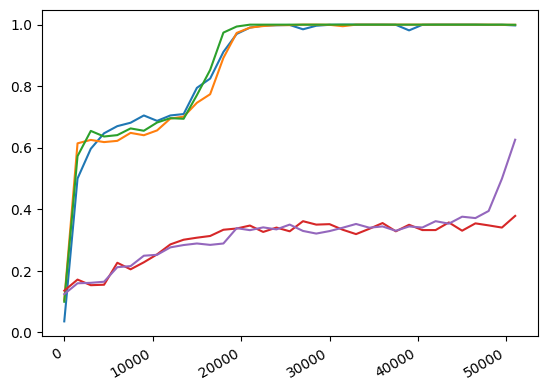

In [16]:
dataEp9 = data1.loc[data1['ep'] ==9 ]

fig, ax = plt.subplots()
ax.plot(dataEp9['passo'], dataEp9['acuracy_questao_0'])
ax.plot(dataEp9['passo'], dataEp9['acuracy_questao_1'])
ax.plot(dataEp9['passo'], dataEp9['acuracy_questao_2'])
ax.plot(dataEp9['passo'], dataEp9['acuracy_questao_3'])
ax.plot(dataEp9['passo'], dataEp9['acuracy_questao_4'])

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
fig.autofmt_xdate()

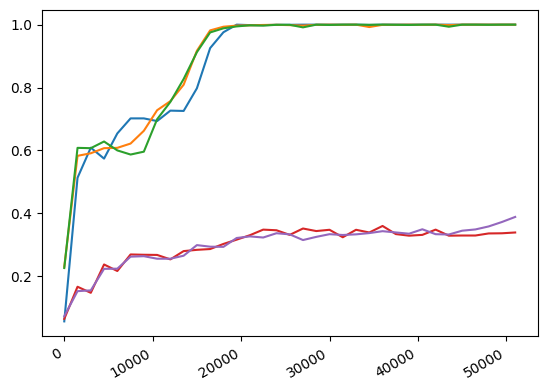

In [17]:
dataEp10 = data1.loc[data1['ep'] ==10 ]

fig, ax = plt.subplots()
ax.plot(dataEp10['passo'], dataEp10['acuracy_questao_0'])
ax.plot(dataEp10['passo'], dataEp10['acuracy_questao_1'])
ax.plot(dataEp10['passo'], dataEp10['acuracy_questao_2'])
ax.plot(dataEp10['passo'], dataEp10['acuracy_questao_3'])
ax.plot(dataEp10['passo'], dataEp10['acuracy_questao_4'])

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
fig.autofmt_xdate()

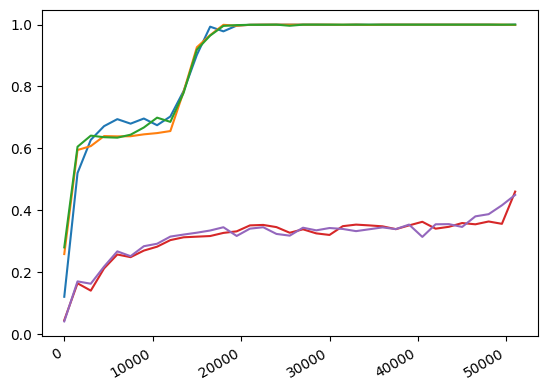

In [18]:
dataEp11 = data1.loc[data1['ep'] ==11 ]

fig, ax = plt.subplots()
ax.plot(dataEp11['passo'], dataEp11['acuracy_questao_0'])
ax.plot(dataEp11['passo'], dataEp11['acuracy_questao_1'])
ax.plot(dataEp11['passo'], dataEp11['acuracy_questao_2'])
ax.plot(dataEp11['passo'], dataEp11['acuracy_questao_3'])
ax.plot(dataEp11['passo'], dataEp11['acuracy_questao_4'])

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
fig.autofmt_xdate()

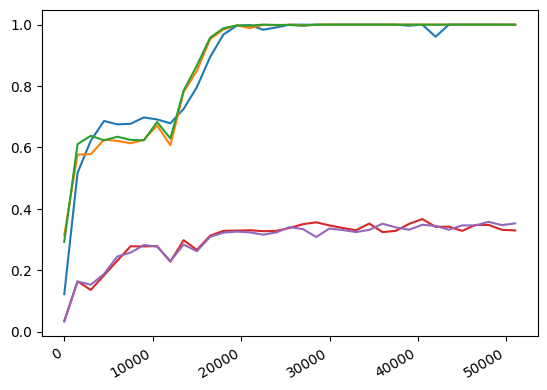

In [19]:
dataEp12 = data1.loc[data1['ep'] ==12 ]

fig, ax = plt.subplots()
ax.plot(dataEp12['passo'], dataEp12['acuracy_questao_0'])
ax.plot(dataEp12['passo'], dataEp12['acuracy_questao_1'])
ax.plot(dataEp12['passo'], dataEp12['acuracy_questao_2'])
ax.plot(dataEp12['passo'], dataEp12['acuracy_questao_3'])
ax.plot(dataEp12['passo'], dataEp12['acuracy_questao_4'])

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
fig.autofmt_xdate()

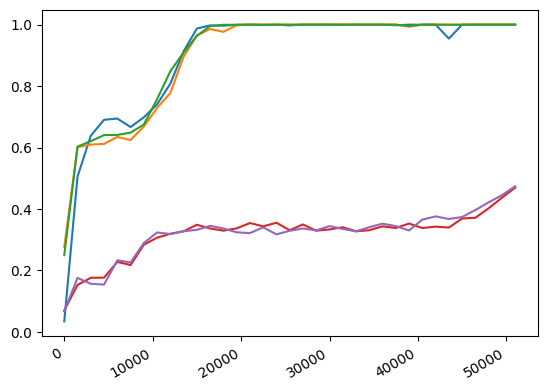

In [20]:
dataEp13 = data1.loc[data1['ep'] ==13 ]

fig, ax = plt.subplots()
ax.plot(dataEp13['passo'], dataEp13['acuracy_questao_0'])
ax.plot(dataEp13['passo'], dataEp13['acuracy_questao_1'])
ax.plot(dataEp13['passo'], dataEp13['acuracy_questao_2'])
ax.plot(dataEp13['passo'], dataEp13['acuracy_questao_3'])
ax.plot(dataEp13['passo'], dataEp13['acuracy_questao_4'])

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
fig.autofmt_xdate()

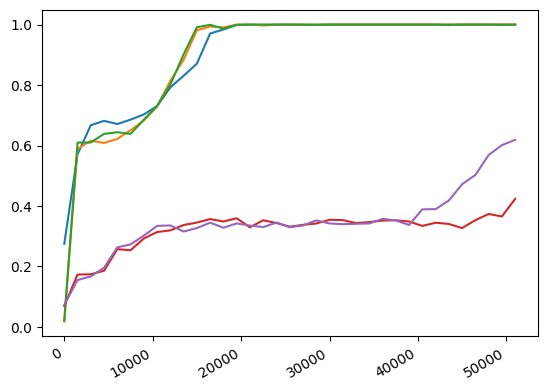

In [21]:
dataEp14 = data1.loc[data1['ep'] ==14 ]

fig, ax = plt.subplots()
ax.plot(dataEp14['passo'], dataEp14['acuracy_questao_0'])
ax.plot(dataEp14['passo'], dataEp14['acuracy_questao_1'])
ax.plot(dataEp14['passo'], dataEp14['acuracy_questao_2'])
ax.plot(dataEp14['passo'], dataEp14['acuracy_questao_3'])
ax.plot(dataEp14['passo'], dataEp14['acuracy_questao_4'])

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
fig.autofmt_xdate()

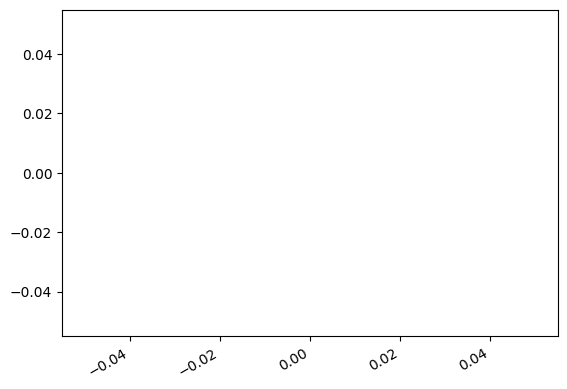

In [22]:
dataEp15 = data1.loc[data1['ep'] ==15 ]

fig, ax = plt.subplots()
ax.plot(dataEp15['passo'], dataEp15['acuracy_questao_0'])
ax.plot(dataEp15['passo'], dataEp15['acuracy_questao_1'])
ax.plot(dataEp15['passo'], dataEp15['acuracy_questao_2'])
ax.plot(dataEp15['passo'], dataEp15['acuracy_questao_3'])
ax.plot(dataEp15['passo'], dataEp15['acuracy_questao_4'])

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
fig.autofmt_xdate()

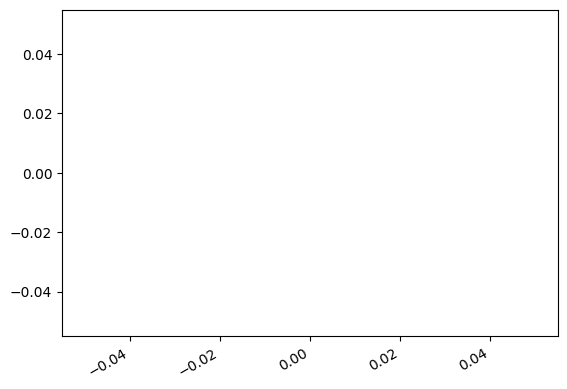

In [23]:
dataEp16 = data1.loc[data1['ep'] ==16 ]

fig, ax = plt.subplots()
ax.plot(dataEp16['passo'], dataEp16['acuracy_questao_0'])
ax.plot(dataEp16['passo'], dataEp16['acuracy_questao_1'])
ax.plot(dataEp16['passo'], dataEp16['acuracy_questao_2'])
ax.plot(dataEp16['passo'], dataEp16['acuracy_questao_3'])
ax.plot(dataEp16['passo'], dataEp16['acuracy_questao_4'])

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
fig.autofmt_xdate()

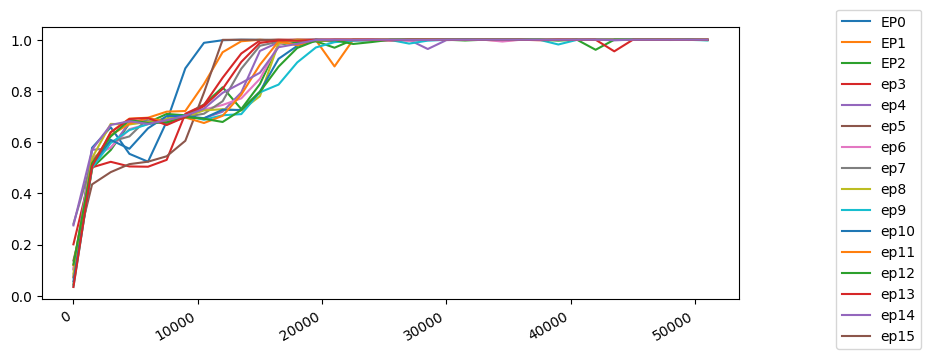

In [24]:
dataEp16 = data1.loc[data1['ep'] ==16 ]

fig, ax = plt.subplots(figsize = (9, 4))
ax.plot(dataEp0['passo'], dataEp0['acuracy_questao_0'],label="EP0")
ax.plot(dataEp1['passo'], dataEp1['acuracy_questao_0'],label="EP1")
ax.plot(dataEp2['passo'], dataEp2['acuracy_questao_0'],label="EP2")
ax.plot(dataEp3['passo'], dataEp3['acuracy_questao_0'],label="ep3")
ax.plot(dataEp4['passo'], dataEp4['acuracy_questao_0'],label="ep4")
ax.plot(dataEp5['passo'], dataEp5['acuracy_questao_0'],label="ep5")
ax.plot(dataEp6['passo'], dataEp6['acuracy_questao_0'],label="ep6")
ax.plot(dataEp7['passo'], dataEp7['acuracy_questao_0'],label="ep7")
ax.plot(dataEp8['passo'], dataEp8['acuracy_questao_0'],label="ep8")
ax.plot(dataEp9['passo'], dataEp9['acuracy_questao_0'],label="ep9")
ax.plot(dataEp10['passo'], dataEp10['acuracy_questao_0'],label="ep10")
ax.plot(dataEp11['passo'], dataEp11['acuracy_questao_0'],label="ep11")
ax.plot(dataEp12['passo'], dataEp12['acuracy_questao_0'],label="ep12")
ax.plot(dataEp13['passo'], dataEp13['acuracy_questao_0'],label="ep13")
ax.plot(dataEp14['passo'], dataEp14['acuracy_questao_0'],label="ep14")
ax.plot(dataEp15['passo'], dataEp15['acuracy_questao_0'],label="ep15")

fig.legend(loc='center left', bbox_to_anchor=(1, .5))
fig.autofmt_xdate()


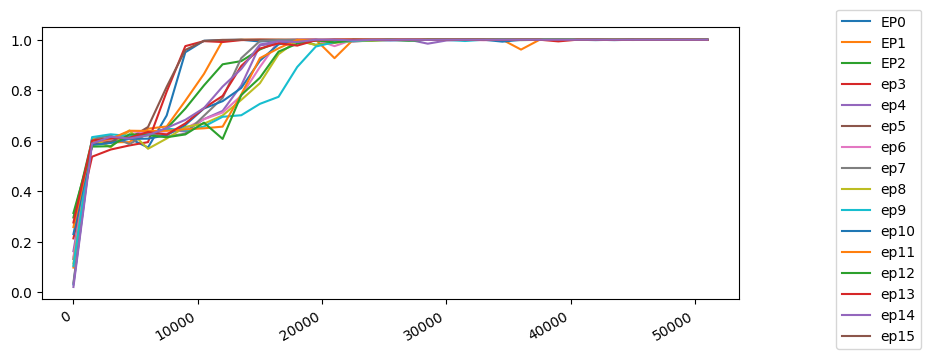

In [25]:
dataEp16 = data1.loc[data1['ep'] ==16 ]

fig, ax = plt.subplots(figsize = (9, 4))
ax.plot(dataEp0['passo'], dataEp0['acuracy_questao_1'],label="EP0")
ax.plot(dataEp1['passo'], dataEp1['acuracy_questao_1'],label="EP1")
ax.plot(dataEp2['passo'], dataEp2['acuracy_questao_1'],label="EP2")
ax.plot(dataEp3['passo'], dataEp3['acuracy_questao_1'],label="ep3")
ax.plot(dataEp4['passo'], dataEp4['acuracy_questao_1'],label="ep4")
ax.plot(dataEp5['passo'], dataEp5['acuracy_questao_1'],label="ep5")
ax.plot(dataEp6['passo'], dataEp6['acuracy_questao_1'],label="ep6")
ax.plot(dataEp7['passo'], dataEp7['acuracy_questao_1'],label="ep7")
ax.plot(dataEp8['passo'], dataEp8['acuracy_questao_1'],label="ep8")
ax.plot(dataEp9['passo'], dataEp9['acuracy_questao_1'],label="ep9")
ax.plot(dataEp10['passo'], dataEp10['acuracy_questao_1'],label="ep10")
ax.plot(dataEp11['passo'], dataEp11['acuracy_questao_1'],label="ep11")
ax.plot(dataEp12['passo'], dataEp12['acuracy_questao_1'],label="ep12")
ax.plot(dataEp13['passo'], dataEp13['acuracy_questao_1'],label="ep13")
ax.plot(dataEp14['passo'], dataEp14['acuracy_questao_1'],label="ep14")
ax.plot(dataEp15['passo'], dataEp15['acuracy_questao_1'],label="ep15")

fig.legend(loc='center left', bbox_to_anchor=(1, .5))
fig.autofmt_xdate()

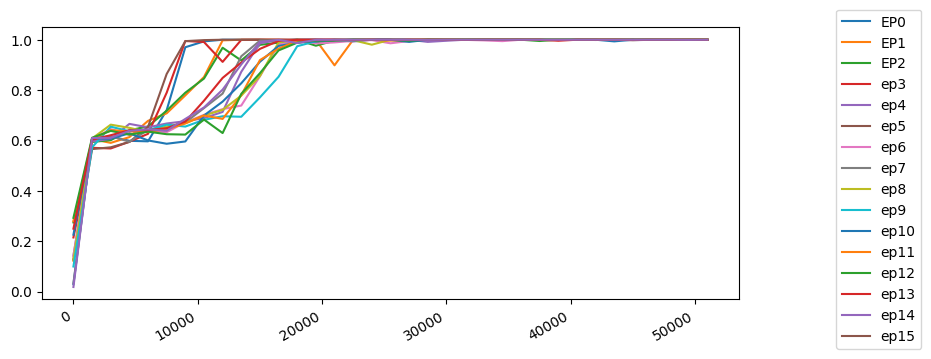

In [26]:
fig, ax = plt.subplots(figsize = (9, 4))
ax.plot(dataEp0['passo'], dataEp0['acuracy_questao_2'],label="EP0")
ax.plot(dataEp1['passo'], dataEp1['acuracy_questao_2'],label="EP1")
ax.plot(dataEp2['passo'], dataEp2['acuracy_questao_2'],label="EP2")
ax.plot(dataEp3['passo'], dataEp3['acuracy_questao_2'],label="ep3")
ax.plot(dataEp4['passo'], dataEp4['acuracy_questao_2'],label="ep4")
ax.plot(dataEp5['passo'], dataEp5['acuracy_questao_2'],label="ep5")
ax.plot(dataEp6['passo'], dataEp6['acuracy_questao_2'],label="ep6")
ax.plot(dataEp7['passo'], dataEp7['acuracy_questao_2'],label="ep7")
ax.plot(dataEp8['passo'], dataEp8['acuracy_questao_2'],label="ep8")
ax.plot(dataEp9['passo'], dataEp9['acuracy_questao_2'],label="ep9")
ax.plot(dataEp10['passo'], dataEp10['acuracy_questao_2'],label="ep10")
ax.plot(dataEp11['passo'], dataEp11['acuracy_questao_2'],label="ep11")
ax.plot(dataEp12['passo'], dataEp12['acuracy_questao_2'],label="ep12")
ax.plot(dataEp13['passo'], dataEp13['acuracy_questao_2'],label="ep13")
ax.plot(dataEp14['passo'], dataEp14['acuracy_questao_2'],label="ep14")
ax.plot(dataEp15['passo'], dataEp15['acuracy_questao_2'],label="ep15")

fig.legend(loc='center left', bbox_to_anchor=(1, .5))
fig.autofmt_xdate()

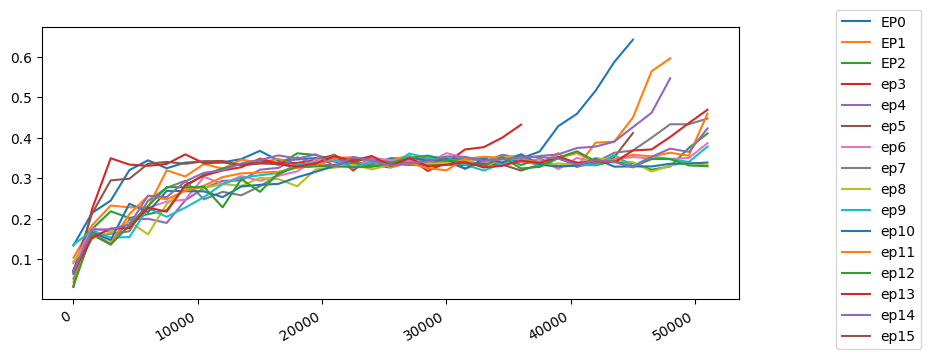

In [27]:
fig, ax = plt.subplots(figsize = (9, 4))
ax.plot(dataEp0['passo'], dataEp0['acuracy_questao_3'],label="EP0")
ax.plot(dataEp1['passo'], dataEp1['acuracy_questao_3'],label="EP1")
ax.plot(dataEp2['passo'], dataEp2['acuracy_questao_3'],label="EP2")
ax.plot(dataEp3['passo'], dataEp3['acuracy_questao_3'],label="ep3")
ax.plot(dataEp4['passo'], dataEp4['acuracy_questao_3'],label="ep4")
ax.plot(dataEp5['passo'], dataEp5['acuracy_questao_3'],label="ep5")
ax.plot(dataEp6['passo'], dataEp6['acuracy_questao_3'],label="ep6")
ax.plot(dataEp7['passo'], dataEp7['acuracy_questao_3'],label="ep7")
ax.plot(dataEp8['passo'], dataEp8['acuracy_questao_3'],label="ep8")
ax.plot(dataEp9['passo'], dataEp9['acuracy_questao_3'],label="ep9")
ax.plot(dataEp10['passo'], dataEp10['acuracy_questao_3'],label="ep10")
ax.plot(dataEp11['passo'], dataEp11['acuracy_questao_3'],label="ep11")
ax.plot(dataEp12['passo'], dataEp12['acuracy_questao_3'],label="ep12")
ax.plot(dataEp13['passo'], dataEp13['acuracy_questao_3'],label="ep13")
ax.plot(dataEp14['passo'], dataEp14['acuracy_questao_3'],label="ep14")
ax.plot(dataEp15['passo'], dataEp15['acuracy_questao_3'],label="ep15")

fig.legend(loc='center left', bbox_to_anchor=(1, .5))
fig.autofmt_xdate()

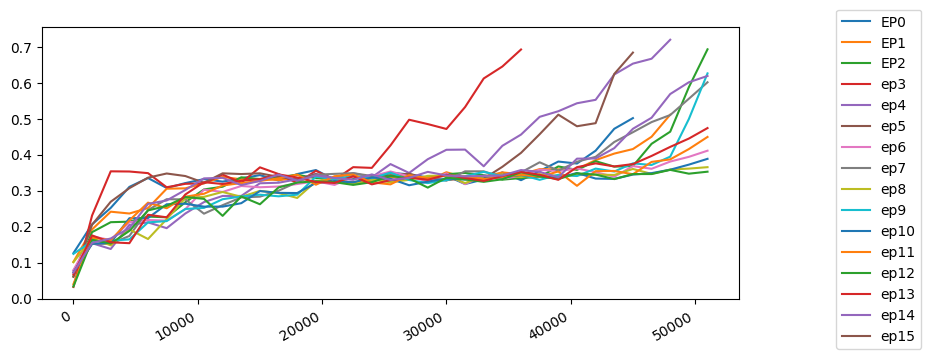

In [28]:
fig, ax = plt.subplots(figsize = (9, 4))
ax.plot(dataEp0['passo'], dataEp0['acuracy_questao_4'],label="EP0")
ax.plot(dataEp1['passo'], dataEp1['acuracy_questao_4'],label="EP1")
ax.plot(dataEp2['passo'], dataEp2['acuracy_questao_4'],label="EP2")
ax.plot(dataEp3['passo'], dataEp3['acuracy_questao_4'],label="ep3")
ax.plot(dataEp4['passo'], dataEp4['acuracy_questao_4'],label="ep4")
ax.plot(dataEp5['passo'], dataEp5['acuracy_questao_4'],label="ep5")
ax.plot(dataEp6['passo'], dataEp6['acuracy_questao_4'],label="ep6")
ax.plot(dataEp7['passo'], dataEp7['acuracy_questao_4'],label="ep7")
ax.plot(dataEp8['passo'], dataEp8['acuracy_questao_4'],label="ep8")
ax.plot(dataEp9['passo'], dataEp9['acuracy_questao_4'],label="ep9")
ax.plot(dataEp10['passo'], dataEp10['acuracy_questao_4'],label="ep10")
ax.plot(dataEp11['passo'], dataEp11['acuracy_questao_4'],label="ep11")
ax.plot(dataEp12['passo'], dataEp12['acuracy_questao_4'],label="ep12")
ax.plot(dataEp13['passo'], dataEp13['acuracy_questao_4'],label="ep13")
ax.plot(dataEp14['passo'], dataEp14['acuracy_questao_4'],label="ep14")
ax.plot(dataEp15['passo'], dataEp15['acuracy_questao_4'],label="ep15")

fig.legend(loc='center left', bbox_to_anchor=(1, .5))
fig.autofmt_xdate()